# 02 - 데이터프레임 결합


## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 데이터 가져오기

In [2]:
# 여태 한 것 중 가장 raw data 더러운 데이터
sales = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_sales_simple.csv")

sales1 = sales.loc[sales['Store_ID']==1]
sales2 = sales.loc[sales['Store_ID']==2]
sales5 = sales.loc[sales['Store_ID']==5]
sales11 = sales.loc[sales['Store_ID']==11]

products = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_product_master.csv")
stores = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_store_master.csv")

In [3]:
sales1.head()

,Order_ID,Date,Store_ID,Qty,Product_ID
0,3,2013-01-01,1,0.0,3
1,5,2013-01-01,1,0.0,5
2,7,2013-01-01,1,0.0,7
3,8,2013-01-01,1,0.0,8
4,10,2013-01-01,1,0.0,10


In [4]:
products.head()
# leadTime > 배송기간 며칠걸리냐

,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price
0,20,HG001,Gardening Tools,Household Goods,2,50
1,27,HH001,Home Appliances,Household Goods,2,150
2,16,HK001,Kitchen,Household Goods,2,23
3,15,HK002,Kitchen,Household Goods,2,41
4,32,GS001,Seafood,Grocery,3,34


In [5]:
stores.head()

,Store_ID,City,State,Store_Type
0,1,Saint Paul,Minnesota,4
1,2,Saint Paul,Minnesota,4
2,3,Saint Paul,Minnesota,4
3,4,Saint Paul,Minnesota,4
4,5,Oklahoma City,Oklahoma,4


## 2.결합1 : 붙이기 concat()

* 데이터를 생성해 봅시다.

In [7]:
# 데이터프레임으로 바꿔줌?
df1 = pd.DataFrame({'A':[10,25], 'B':[15,30]})
df2 = pd.DataFrame({'A':[20,30, 50], 'C':[35,30, 40]})
# axis = 0 은 디폴트임. 인플레이스 트루는 진짜 지워라는 뜻 ㅇㅇ 
df2.drop([1], inplace = True)

print(df1)
display(df2)

    A   B
0  10  15
1  25  30


,A,C
0,20,35
2,50,40


#### (1) 세로로 합치기 : axis = 0

* join = 'inner'

In [8]:
# 위아래로, 공통된 열만 보여줘 조회임
pd.concat([df1, df2], axis = 0, join = 'inner')

,A
0,10
1,25
0,20
2,50


In [9]:
temp = pd.concat([df1, df2], axis = 0, join = 'inner')
temp.loc[0]

,A
0,10
0,20


* join = 'outer'

In [10]:
pd.concat([df1, df2], axis = 0, join = 'outer')

,A,B,C
0,10,15.0,NaN
1,25,30.0,NaN
0,20,NaN,35.0
2,50,NaN,40.0


#### (2) 가로로 합치기 : axis = 1

* join = 'inner'

In [11]:
# 옆으로 붙이기 공통된 것만 
pd.concat([df1, df2], axis = 1, join = 'inner')

,A,B,A,C
0,10,15,20,35


In [15]:
temp2 = pd.concat([df1, df2], axis = 1, join = 'inner')
temp2

,A,B,A,C
0,10,15,20,35


* join = 'outer'

In [14]:
pd.concat([df1, df2], axis = 1, join = 'outer')

,A,B,A,C
0,10.0,15.0,20.0,35.0
1,25.0,30.0,NaN,NaN
2,NaN,NaN,50.0,40.0


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] sales1,2,5,11 데이터프레임을 하나로 합칩시다. 어떻게 합치는게 좋을까요?

In [16]:
sales1.head()

,Order_ID,Date,Store_ID,Qty,Product_ID
0,3,2013-01-01,1,0.0,3
1,5,2013-01-01,1,0.0,5
2,7,2013-01-01,1,0.0,7
3,8,2013-01-01,1,0.0,8
4,10,2013-01-01,1,0.0,10


In [17]:
sales2.head()

,Order_ID,Date,Store_ID,Qty,Product_ID
165,366,2013-01-01,2,0.0,3
166,368,2013-01-01,2,0.0,5
167,370,2013-01-01,2,0.0,7
168,371,2013-01-01,2,0.0,8
169,373,2013-01-01,2,0.0,10


In [18]:
sales5.head()

,Order_ID,Date,Store_ID,Qty,Product_ID
660,1455,2013-01-01,5,0.0,3
661,1457,2013-01-01,5,0.0,5
662,1459,2013-01-01,5,0.0,7
663,1460,2013-01-01,5,0.0,8
664,1462,2013-01-01,5,0.0,10


In [19]:
sales11.head()

,Order_ID,Date,Store_ID,Qty,Product_ID
30,69,2013-01-01,11,0.0,3
31,71,2013-01-01,11,0.0,5
32,73,2013-01-01,11,0.0,7
33,74,2013-01-01,11,0.0,8
34,76,2013-01-01,11,0.0,10


In [20]:
sales0 = pd.concat([sales1, sales2, sales5, sales11], join = 'inner', axis = 0)
sales0

,Order_ID,Date,Store_ID,Qty,Product_ID
0,3,2013-01-01,1,0.000,3
1,5,2013-01-01,1,0.000,5
2,7,2013-01-01,1,0.000,7
3,8,2013-01-01,1,0.000,8
4,10,2013-01-01,1,0.000,10
...,...,...,...,...,...
24340,53548,2013-01-31,11,10.000,22
24341,53550,2013-01-31,11,641.507,24
24342,53553,2013-01-31,11,0.000,27
24343,53555,2013-01-31,11,27.000,29


[문2] (조금 어려운 문제!)  
일별, 매장별 판매량 합계를 구해 봅시다.  
groupby, pd.concat 을 이용하여 다음과 같은 결과를 얻도록 코드를 작성해봅시다.

* 힌트
    * 1) sales1, 2, 5,11 로 부터 각각 일별 판매량 합계 집계하기
        * 집계시 .agg() 를 이용하여 열이름 변경하거나, 집계후 열이름 변경하기
    * 2) pd.concat 으로 가로로 합치기



## 3.결합 ① : 조인 join(merge)

* 판다스에서 join은 굉장히 간단합니다.
* 자동으로 key를 잡아줍니다
* default로 inner join을 합니다.

In [21]:
df1 = pd.DataFrame({'A':[1,2], 'B':[15,30], 'C':[20, 25]})
df2 = pd.DataFrame({'A':[2,3], 'D':[20, 35]})

display(df1)
display(df2)

,A,B,C
0,1,15,20
1,2,30,25


,A,D
0,2,20
1,3,35


### (1) inner merge

In [22]:
# A라는 칼럼 이름을 기준으로 이너 머지를 해라
pd.merge(df1, df2, how = 'inner', on = 'A')
# how 는 concat의 join과 같음
# on 생략 가능... 알아서 공통된거 찾아줌

,A,B,C,D
0,2,30,25,20


In [23]:
pd.merge(df1, df2, how = 'inner')

,A,B,C,D
0,2,30,25,20


In [24]:
# 위의 것과 다 똑같음... 알아서 해주기 때문
pd.merge(df1, df2)

,A,B,C,D
0,2,30,25,20


### (2) left merge

In [25]:
# 왼쪽은 다 보여주고, A와 공통된 값이 있으면 보여주고 없으면 nan
pd.merge(df1, df2, how = 'left')

,A,B,C,D
0,1,15,20,NaN
1,2,30,25,20.0


### (3) right merge

In [26]:
pd.merge(df1, df2, how = 'right')

,A,B,C,D
0,2,30.0,25.0,20
1,3,NaN,NaN,35


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] 일별, 매장별 판매량 합계를 구해 봅시다.  
groupby, pd.merge 을 이용하여 다음과 같은 결과를 얻도록 코드를 작성해봅시다.

* 힌트
    * 1) sales1, 2, 5,11 로 부터 각각 일별 판매량 합계 집계하기
        * 집계시 .agg() 를 이용하여 열이름 변경하거나, 집계후 열이름 변경하기
    * 2) pd.merge 으로 결합하기



[문2] 매장1에 대해서, 일별, 카테고리별 판매량 합계를 구해 봅시다. 



[문3] 도시별, 총판매량 합계를 구하시오.  



### (4) pivot
* pivot : 결합은 아니지만, 집계 후 데이터프레임 구조를 변형해서 조회하는데 종종 사용 됩니다.

* 단계
    * 1) groupby
    * 2) pivot

In [53]:
# 1) 매장1의 일별 카테고리별 판매량을 집계

temp = pd.merge(sales1, products)
temp2 = temp.groupby(['Date', 'Category'], as_index = False)['Qty'].sum()
temp2

,Date,Category,Qty
0,2013-01-01,Drink,0.000
1,2013-01-01,Food,0.000
2,2013-01-01,Grocery,0.000
3,2013-01-01,Household Goods,0.000
4,2013-01-02,Drink,1158.000
...,...,...,...
119,2013-01-30,Household Goods,932.000
120,2013-01-31,Drink,971.000
121,2013-01-31,Food,751.766
122,2013-01-31,Grocery,1907.797


In [54]:
# 2) pivot
temp3 = temp2.pivot( 'Category', 'Date' ,'Qty')
temp3

C:\Users\User\AppData\Local\Temp\ipykernel_16240\4232607422.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  temp3 = temp2.pivot( 'Category', 'Date' ,'Qty')


Date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2013-01-22,2013-01-23,2013-01-24,2013-01-25,2013-01-26,2013-01-27,2013-01-28,2013-01-29,2013-01-30,2013-01-31
Category,,,,,,,,,,,,,,,,,,,,,
Drink,0.0,1158.000,985.000000,1055.000000,1319.000,407.000,1267.000,1115.000,1290.00000,914.000,...,1114.000,1152.000,924.000,1213.000,1132.000,417.000,830.000,999.000,1140.000,971.000
Food,0.0,1227.652,913.699000,790.366000,901.057,416.912,852.676,829.851,967.58200,775.515,...,780.201,1025.047,791.388,836.856,880.019,416.783,821.064,668.154,900.092,751.766
Grocery,0.0,3305.130,2613.685001,2711.079001,2746.782,926.282,2689.720,2356.277,3023.57298,1933.235,...,2242.216,2824.296,2221.805,2393.208,2257.907,1162.207,2208.364,2001.047,2662.485,1907.797
Household Goods,0.0,1070.000,836.000000,834.000000,821.000,257.000,830.000,830.000,917.00000,687.000,...,786.000,769.000,622.000,701.000,551.000,247.000,625.000,617.000,932.000,711.000


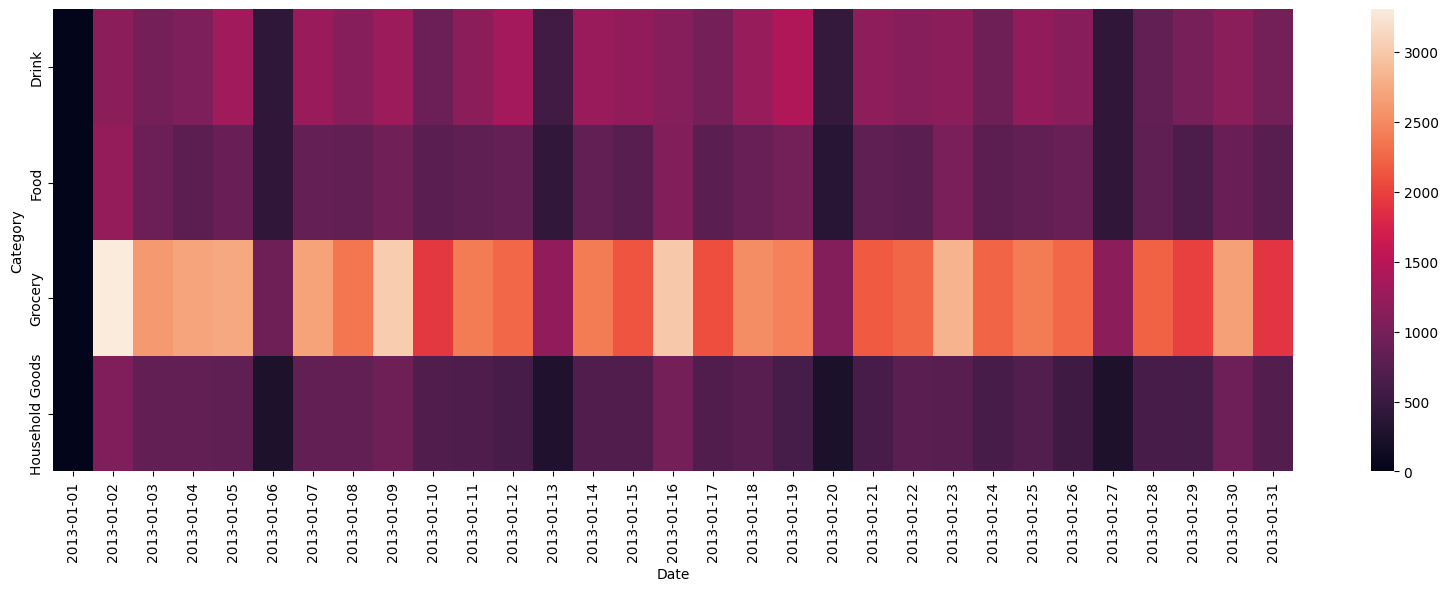

In [55]:
# sns.heatmap으로 시각화 할 수도 있습니다!

plt.figure(figsize = (20, 6))
sns.heatmap(temp3)
plt.show()

## 4.복습문제

In [27]:
# 라이브러리 불러오기
import pandas as pd

In [28]:
sales = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_sales_simple.csv")
products = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_product_master.csv")
stores = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_store_master.csv")

In [29]:
sales.head(3)

,Order_ID,Date,Store_ID,Qty,Product_ID
0,3,2013-01-01,1,0.0,3
1,5,2013-01-01,1,0.0,5
2,7,2013-01-01,1,0.0,7


In [30]:
products.head(3)

,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price
0,20,HG001,Gardening Tools,Household Goods,2,50
1,27,HH001,Home Appliances,Household Goods,2,150
2,16,HK001,Kitchen,Household Goods,2,23


In [31]:
stores.head(3)

,Store_ID,City,State,Store_Type
0,1,Saint Paul,Minnesota,4
1,2,Saint Paul,Minnesota,4
2,3,Saint Paul,Minnesota,4


1) sales에 금액(Amt) 변수를 추가하시오.
* Amt = Qty * Price

In [35]:
# 가장 이상적인 답변. price만 보고 싶을 때
sales2 = pd.merge(sales, products.loc[:, ['Product_ID', 'Price']], how='inner', on='Product_ID')
sales2.head()

,Order_ID,Date,Store_ID,Qty,Product_ID,Price
0,3,2013-01-01,1,0.0,3,8
1,36,2013-01-01,10,0.0,3,8
2,69,2013-01-01,11,0.0,3,8
3,102,2013-01-01,12,0.0,3,8
4,135,2013-01-01,13,0.0,3,8


In [36]:
sales2 = pd.merge(sales, products, how='inner', on='Product_ID')
sales2.head()

,Order_ID,Date,Store_ID,Qty,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price
0,3,2013-01-01,1,0.0,3,DB001,Beverage,Drink,2,8
1,36,2013-01-01,10,0.0,3,DB001,Beverage,Drink,2,8
2,69,2013-01-01,11,0.0,3,DB001,Beverage,Drink,2,8
3,102,2013-01-01,12,0.0,3,DB001,Beverage,Drink,2,8
4,135,2013-01-01,13,0.0,3,DB001,Beverage,Drink,2,8


In [37]:
sales2['Amt'] = sales2['Qty'] * sales2['Price']
sales2.head()

,Order_ID,Date,Store_ID,Qty,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price,Amt
0,3,2013-01-01,1,0.0,3,DB001,Beverage,Drink,2,8,0.0
1,36,2013-01-01,10,0.0,3,DB001,Beverage,Drink,2,8,0.0
2,69,2013-01-01,11,0.0,3,DB001,Beverage,Drink,2,8,0.0
3,102,2013-01-01,12,0.0,3,DB001,Beverage,Drink,2,8,0.0
4,135,2013-01-01,13,0.0,3,DB001,Beverage,Drink,2,8,0.0


In [38]:
sales['Qty'] * products['Price']
# price는 인덱스가 적은데 Qty랑 비교해서 곱하면 NaN이 나오잖아... 그래서 product id를 기준으로 곱하는 게 좋음


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
25105    NaN
25106    NaN
25107    NaN
25108    NaN
25109    NaN
Length: 25110, dtype: float64

In [39]:
sales['Qty']

0          0.000
1          0.000
2          0.000
3          0.000
4          0.000
          ...   
25105     47.000
25106    348.475
25107      0.000
25108     42.000
25109     24.986
Name: Qty, Length: 25110, dtype: float64

In [40]:
products['Price']

0      50
1     150
2      23
3      41
4      34
5      12
6      18
7      29
8       5
9      17
10      6
11      4
12     15
13      8
14      6
Name: Price, dtype: int64

2) 상품(Product_Code)별 매출액

In [41]:
sales2.groupby('Product_Code', as_index=False)['Amt'].sum()

,Product_Code,Amt
0,DA001,1.062816e+06
1,DB001,1.336522e+07
2,FB001,3.298673e+06
3,FF001,3.423657e+06
4,FM001,2.094948e+06
5,FP001,2.456785e+06
6,GA001,2.419344e+07
7,GE001,1.017210e+06
8,GM001,9.063631e+06
9,GS001,1.188430e+06


3) City별 카테고리리별 매출액

In [49]:
# 1. sales2랑 stores를 merge
sales3 = pd.merge(sales2, stores, how='inner', on='Store_ID')
sales3.head()
# 2. groupby
sales3.groupby(['City', 'Category'], as_index=False)['Amt'].sum()

,City,Category,Amt
0,Albany,Drink,2.367080e+05
1,Albany,Food,6.998561e+04
2,Albany,Grocery,3.676481e+05
3,Albany,Household Goods,2.875500e+05
4,Annapolis,Drink,3.507200e+05
...,...,...,...
79,Saint Paul,Household Goods,1.081224e+07
80,Wilmington,Drink,0.000000e+00
81,Wilmington,Food,0.000000e+00
82,Wilmington,Grocery,0.000000e+00


4) 매출액이 가장 높은 주(state) top 3

In [50]:
# 주별 (state별)로 매출액 합계를 구하고 
sales3.groupby('State', as_index=False)['Amt'].sum()

# 그룹바이하면 ㅇㅇㅇ별은 알아서 정렬이 되어 있음 하지만 우린 Amt의 정렬이 필요

,State,Amt
0,Arizona,4.192750e+06
1,California,8.744844e+05
2,Georgia,3.374833e+06
3,Indiana,2.410887e+06
4,Maryland,1.926923e+06
5,Massachusetts,9.879414e+05
6,Minnesota,4.733903e+07
7,New York,9.618918e+05
8,North Carolina,1.133845e+07
9,Ohio,1.650586e+06


In [51]:
temp = sales3.groupby('State', as_index=False)['Amt'].sum()
# 매출액 기준 정렬(내림차순)
temp.sort_values('Amt', ascending=False)

,State,Amt
6,Minnesota,4.733903e+07
8,North Carolina,1.133845e+07
0,Arizona,4.192750e+06
2,Georgia,3.374833e+06
10,Oklahoma,2.745415e+06
3,Indiana,2.410887e+06
4,Maryland,1.926923e+06
13,Virginia,1.866015e+06
9,Ohio,1.650586e+06
11,Pennsylvania,1.345873e+06


In [52]:
# .head(3) 그럼 top3 보임
temp.sort_values('Amt', ascending=False).head(3)


,State,Amt
6,Minnesota,4.733903e+07
8,North Carolina,1.133845e+07
0,Arizona,4.192750e+06
